1. Implemente un modelo de regresión que estime el peso de una persona a partir de su altura y edad. Luego, imprima en pantalla la métrica R^2 para medir el desempeño del modelo.

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

filepath = './obesity.csv'
dataset = pd.read_csv(filepath, header=0)

X = dataset[['Height', 'Age']].values
y = dataset['Weight'].values

regression_model = LinearRegression()
regression_model.fit(X, y)

y_pred = regression_model.predict(X)
r2 = r2_score(y, y_pred)

print(f'Coeficiente R² del modelo: {r2:.4f}')

Coeficiente R² del modelo: 0.2606


2. Aumente la complejidad del modelo de regresión y agregue variables independientes (numéricas y/o categóricas) tanto como se requiera, con el fin de mejorar las métricas de evaluación. Despliegue en la sesión de trabajo los resultados respectivos.

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for feature in categorical_features:
    le = LabelEncoder()
    dataset[feature] = le.fit_transform(dataset[feature].astype(str))
    label_encoders[feature] = le

features = ['Age', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] + categorical_features
X_full = dataset[features]
y = dataset['Weight']

model_full = LinearRegression()
model_full.fit(X_full, y)
y_pred_full = model_full.predict(X_full)
r2_full = r2_score(y, y_pred_full)

print(f"R² con todas las variables: {r2_full:.4f}")

R² con todas las variables: 0.5525


3. Implemente un modelo de clasificación que estime el grado de obesidad de una persona (NObeyesdad) basado únicamente en atributos de sus hábitos de alimentación. Luego, imprima en pantalla la exactitud del modelo y su matriz de confusión.

=== MODELO k-NN BASADO EN HÁBITOS DE ALIMENTACIÓN ===
Exactitud del modelo k-NN: 0.5978 (59.78%)
Clases: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']

Matriz de Confusión:
                     Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Insufficient_Weight                   56              8               9   
Normal_Weight                          9             57               5   
Obesity_Type_I                         3             11              61   
Obesity_Type_II                        2              5               7   
Obesity_Type_III                       0              4               0   
Overweight_Level_I                     6             22              13   
Overweight_Level_II                    4             16              23   

                     Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Insufficient_Weight                3                 0  

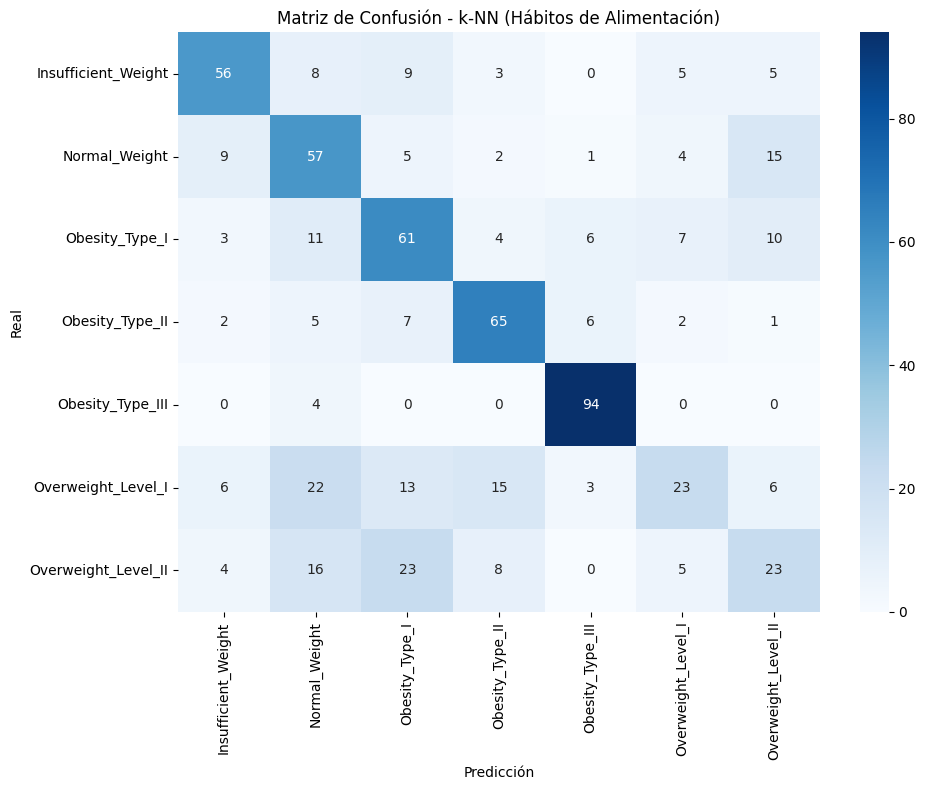


Variables utilizadas: ['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'CALC']


In [16]:
# 3. Implemente un modelo de clasificación que estime el grado de obesidad de una persona (NObeyesdad) 
# basado únicamente en atributos de sus hábitos de alimentación. Luego, imprima en pantalla la 
# exactitud del modelo y su matriz de confusión.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Variables de hábitos de alimentación
eating_habits_features = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'CALC']

# Preparar datos (usando el dataset ya codificado de la sección 2)
X_eating = dataset[eating_habits_features]
y_obesity = dataset['NObeyesdad']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_eating, y_obesity, test_size=0.3, random_state=42)

print("=== MODELO k-NN BASADO EN HÁBITOS DE ALIMENTACIÓN ===")

# Clasificador multiclase del k-ésimo vecino más cercano
n_neighbors = 7  # asociado al número de clases de obesidad
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Exactitud del modelo k-NN: {accuracy:.4f} ({accuracy*100:.2f}%)')
print(f'Clases: {knn_model.classes_}')

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, 
                    index=knn_model.classes_, 
                    columns=knn_model.classes_)

print("\nMatriz de Confusión:")
print(cm_df)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusión - k-NN (Hábitos de Alimentación)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

print(f"\nVariables utilizadas: {eating_habits_features}")

4. Implemente otro modelo de clasificación que estime el NObeyesdad de una persona basado únicamente en atributos relacionados con su condición física. Luego, imprima en pantalla la exactitud del modelo y su matriz de confusión.

=== MODELO SVM BASADO EN CONDICIÓN FÍSICA ===
Exactitud del modelo SVM: 0.3565 (35.65%)
Clases: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']

Matriz de Confusión:
                     Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Insufficient_Weight                   14              3              23   
Normal_Weight                          8             17              15   
Obesity_Type_I                        14              3              29   
Obesity_Type_II                        0              0              14   
Obesity_Type_III                       0              0               0   
Overweight_Level_I                     6              6              18   
Overweight_Level_II                    9              2              14   

                     Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Insufficient_Weight               15                29           

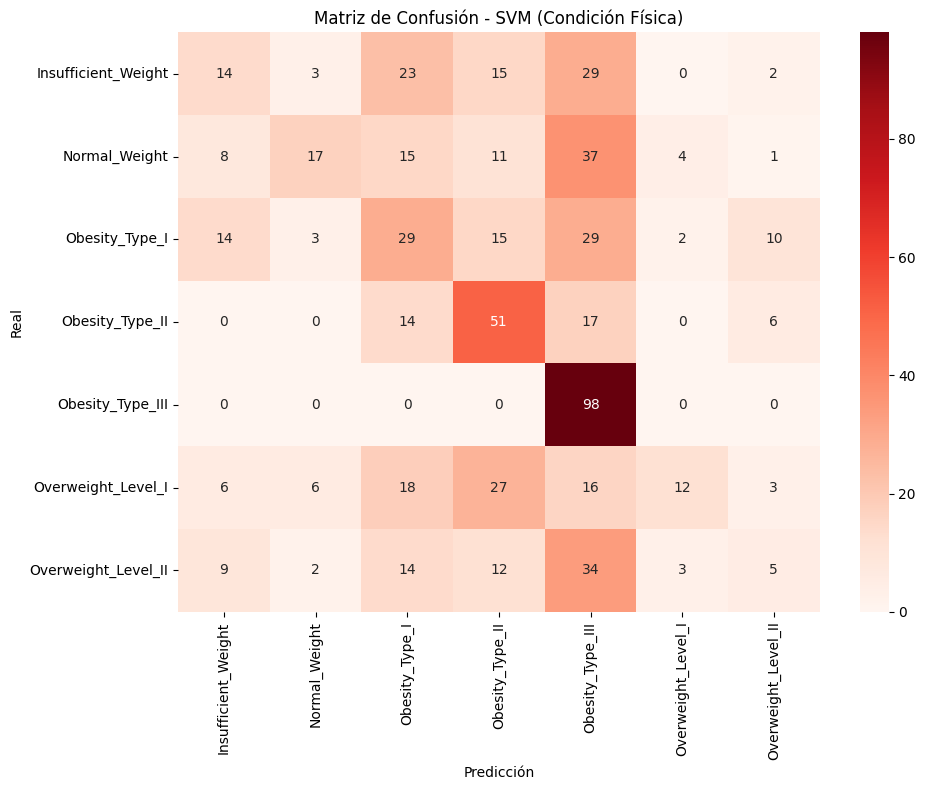


Variables utilizadas: ['SCC', 'FAF', 'TUE', 'MTRANS']

COMPARACIÓN ENTRE MODELOS
k-NN (Hábitos alimentación): 0.5978
SVM (Condición física):      0.3565


In [17]:
from sklearn import svm

# Variables de condición física según la descripción
physical_condition_features = ['SCC', 'FAF', 'TUE', 'MTRANS']

# Preparar datos
X_physical = dataset[physical_condition_features]
y_obesity = dataset['NObeyesdad']  # Misma variable objetivo

# Dividir en entrenamiento y prueba
X_train_phys, X_test_phys, y_train_phys, y_test_phys = train_test_split(
    X_physical, y_obesity, test_size=0.3, random_state=42
)

print("=== MODELO SVM BASADO EN CONDICIÓN FÍSICA ===")

# Clasificador multiclase de máquinas de soporte vectorial
svm_model = svm.SVC(degree=3, C=10, random_state=42)
svm_model.fit(X_train_phys, y_train_phys)

# Predecir y evaluar
y_pred_phys = svm_model.predict(X_test_phys)
accuracy_phys = accuracy_score(y_test_phys, y_pred_phys)

print(f'Exactitud del modelo SVM: {accuracy_phys:.4f} ({accuracy_phys*100:.2f}%)')
print(f'Clases: {svm_model.classes_}')

# Matriz de confusión
cm_phys = confusion_matrix(y_test_phys, y_pred_phys)
cm_df_phys = pd.DataFrame(cm_phys, 
                         index=svm_model.classes_, 
                         columns=svm_model.classes_)

print("\nMatriz de Confusión:")
print(cm_df_phys)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_phys, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.title('Matriz de Confusión - SVM (Condición Física)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

print(f"\nVariables utilizadas: {physical_condition_features}")

# Comparación final
print(f"\n{'='*60}")
print("COMPARACIÓN ENTRE MODELOS")
print(f"{'='*60}")
print(f"k-NN (Hábitos alimentación): {accuracy:.4f}")
print(f"SVM (Condición física):      {accuracy_phys:.4f}")

5. Opcional: ¿Cuál de los dos modelos logra predecir con mayor exactitud el grado de obesidad de una persona? ¿Cuál es la categoría de obesidad que presentó más falsos negativos para cada modelo? ¿Cuál es la categoría de obesidad que presentó más falsos positivos para cada modelo?


Si se suman todas las entradas $M_{i,j}$ de la fila $i$ en donde $i \neq j$ se obtiene el total de **falsos positivos** para la clase ${c}_i$ y si se suman todas las entradas $M_{i,j}$ de la columna $j$ en donde $i \neq j$ se obtiene el total de **falsos negativos** para la clase ${c}_j$.